In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Serbatoi Comunicanti

**Tre serbatoi comunicano attraverso condotte**

<center>
<img src="assets/tubes3_a.png" width=50%/>
</center>

## Esercizio: Serbatoi Comunicanti

**Tre serbatoi comunicano attraverso condotte**

<center>
<img src="assets/tubes3.png" width=50%/>
</center>

* Il problema può essere modellato con un circuito RC
* La tensioni corrispondono a valori di pressione (i.e. $P_1$, $P_2$, $P_3$)
* Le correndi a flussi di acqua (i.e. $q_{12}$, $q_{23}$, $q_{31}$)
* Il modello è approssimativo, ma a noi basterà


## Esercizio: Serbatoi Comunicanti

**Il sistema è descritto dall'ODE:**

$$
\left(\begin{array}{c}
\dot{P}_1 \\
\dot{P}_2 \\
\dot{P}_3
\end{array}\right)
=
\left(\begin{array}{c}
\frac{1}{C_1} (q_{31} - q_{12}) \\
\frac{1}{C_2} (q_{12} - q_{23}) \\
\frac{1}{C_3} (q_{23} - q_{31})
\end{array}\right)
$$

Con:

$$
\begin{align}
& q_{12} = \frac{1}{R_{12}} (P_1 - P_2) && q_{23} = \frac{1}{R_{23}} (P_2 - P_3) \\
& q_{31} = \frac{1}{R_{31}} (P_3 - P_1)
\end{align}
$$


## Esercizio: Serbatoi Comunicanti

**Prima di tutto, procediamo a caricare i dati del problema**

Potete farlo usando la cella seguente:

In [2]:
# Dati intermedi
g = 9.81
S1 = 1 # Superfici
S2 = 1
S3 = 1
h1 = 3 # Livelli dei serbatoi
h2 = 2
h3 = 1
qmax12 = 0.0002 # Portata per unita' di pressione
qmax23 = 0.0007
qmax31 = 0.0008

# Capacita'
C1 = S1/g
C2 = S2/g
C3 = S3/g

# Resistenze
R12 = 1/qmax12
R23 = 1/qmax23
R31 = 1/qmax31

# Pressioni iniziali
P1_0 = h1 * g
P2_0 = h2 * g
P3_0 = h3 * g

## Esercizio: Serbatoi Comunicanti

**Nel modulo `sol.tubes` si definisca una classe:**

```python
class Dstate:
    def __init__(self, C1, C2, C3, R12, R23, R31):
        ...

    def __call__(self, X, t):
        ...
```

...Che rappresenti la funzione che definisce l'ODE

* Il metodo `__call__` deve calcolare le derivate
* ...E restiuirle sotto forma di `numpy.array`

Nella cella seguente:

* Si utilizzi la classe per calcolare il gradiente
* ...Per lo stato fornito nella cella ed il tempo $t_0 = 0$

In [5]:
from sol import tubes
import numpy as np

X0 = np.array([P1_0, P2_0, P3_0])
t0 = 0

dstate = tubes.Dstate(C1, C2, C3, R12, R23, R31)
dstate(X=X0, t=t0)

array([-0.17322498, -0.04811805,  0.22134303])

## Esercizio: Serbatoi Comunicanti

**Nel modulo `sol.tubes` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento dei serbatoi:

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo
* La funzione deve anche disegnare un grafico utilizzando `base.util.plot_state_evolution`

**Si utilizzi la funzione per determinare il comportamento dei serbatoi**

* Per un periodo di 600 secondi
* ...A partire dallo stato iniziale indicato nella cella

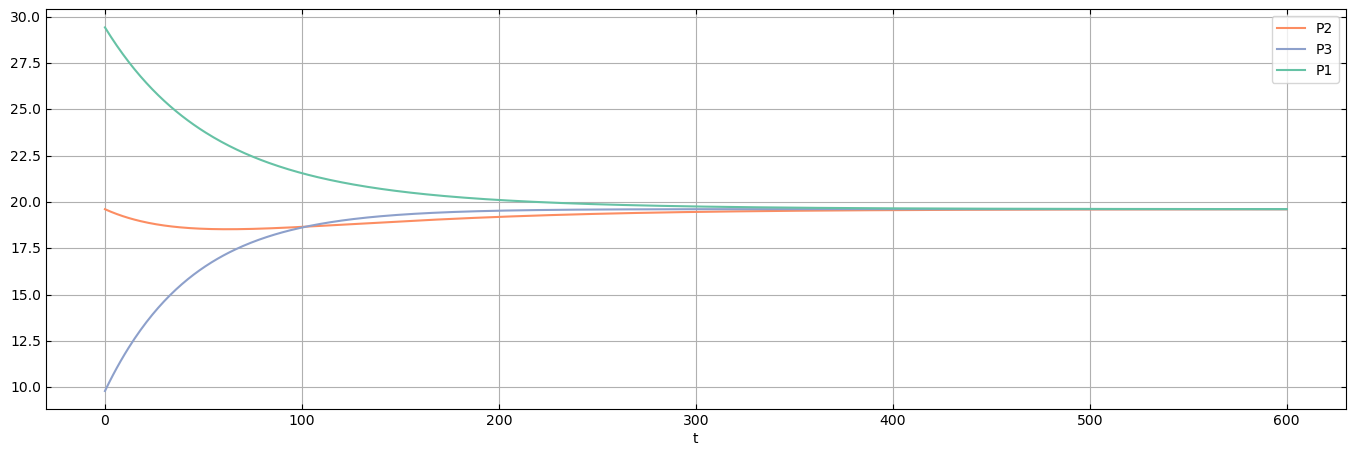

In [7]:
from scipy.integrate import odeint

X0 = np.array([P1_0, P2_0, P3_0])
t = np.linspace(0, 600, 600)

X, t = tubes.simulate(dstate, X0, t)

## Esercizio: Serbatoi Comunicanti

**Nel modulo `sol.tubes` si definisca una funzione:**

```python
def final_P1(X, t)
```

* Che restituisca il valore finale della pressione $P_1$

Si stampi a video il risultato

In [8]:
print(f'Valore finale di P1: {tubes.final_P1(X, t)}')

Valore finale di P1: 19.624821495425323


## Esercizio: Serbatoi Comunicanti

**Nel modulo `sol.tubes` si definisca una funzione:**

```python
def times_P2_eq_P3(X, t)
```

* Che restituisca come array
* ...I valori di tempo per cui $|P_2-P_3| < 1e-2$

Si stampi a video il risultato

In [9]:
t_same = tubes.times_P2_eq_P3(X, t)
print(f'Valori di tempo per cui P2 e P3 sono approssimativamente uguali: {t_same}')

Valori di tempo per cui P2 e P3 sono approssimativamente uguali: [102.17028381 549.91652755 550.91819699 551.91986644 552.92153589
 553.92320534 554.92487479 555.92654424 556.92821369 557.92988314
 558.93155259 559.93322204 560.93489149 561.93656093 562.93823038
 563.93989983 564.94156928 565.94323873 566.94490818 567.94657763
 568.94824708 569.94991653 570.95158598 571.95325543 572.95492487
 573.95659432 574.95826377 575.95993322 576.96160267 577.96327212
 578.96494157 579.96661102 580.96828047 581.96994992 582.97161937
 583.97328881 584.97495826 585.97662771 586.97829716 587.97996661
 588.98163606 589.98330551 590.98497496 591.98664441 592.98831386
 593.98998331 594.99165275 595.9933222  596.99499165 597.9966611
 598.99833055 600.        ]
